In [ ]:

# PROYECTO CHURN PREDICTION 
# CIENCIA DE DATOS I - CODERHOUSE

In [ ]:
# ---------------------
# 1. ABSTRACT
# ---------------------

"""

En este proyecto se analiza un conjunto de datos sobre clientes de una entidad bancaria europea, con el objetivo de identificar patrones asociados a la pérdida de clientes (churn). 
El dataset contiene información demográfica, financiera y comportamental de más de 10.000 personas, incluyendo variables como edad, país, balance, productos contratados, entre otros.
El foco principal está puesto en comprender cuáles son los factores que más inciden en que un cliente decida abandonar la entidad. 
Para ello, se proponen preguntas exploratorias y se desarrollan visualizaciones que permiten contrastar hipótesis iniciales, como por ejemplo si la edad, el país o el comportamiento 
financiero influyen en la retención del cliente.
En esta primera entrega se realiza un análisis exploratorio con visualizaciones univariadas, bivariadas y multivariadas, y se identifican los valores faltantes presentes en el dataset. 
Este análisis servirá de base para futuras etapas del proyecto, donde se profundizará en modelos predictivos y estrategias de retención.

"""

In [1]:
# ---------------------
# 2. About the Dataset
# ---------------------

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

"""
El dataset contiene información sobre clientes de un banco que ya se han ido o que continúan siendo clientes. El conjunto incluye los siguientes atributos:

- Customer ID: Un identificador único para cada cliente.

- Surname: El apellido del cliente.

- Credit Score: Un valor numérico que representa el puntaje crediticio del cliente.

- Geography: El país donde reside el cliente (Francia, España o Alemania).

- Gender: El género del cliente (Masculino o Femenino).

- Age: La edad del cliente.

- Tenure: La cantidad de años que el cliente ha estado en el banco.

- Balance: El saldo de la cuenta del cliente.

- NumOfProducts: La cantidad de productos bancarios que utiliza el cliente (por ejemplo, cuenta de ahorro, tarjeta de crédito).

- HasCrCard: Indica si el cliente tiene tarjeta de crédito (1 = sí, 0 = no).

- IsActiveMember: Indica si el cliente es miembro activo (1 = sí, 0 = no).

- EstimatedSalary: El salario estimado del cliente.

- Exited: Indica si el cliente abandonó el banco (1 = sí, 0 = no).

Este Dataset tiene un total de 14 columnas, las 13 anteriores más RowNumber que hace referencia al número de la fila.


"""

'\nEl dataset contiene información sobre clientes de un banco que ya se han ido o que continúan siendo clientes. El conjunto incluye los siguientes atributos:\n\n- Customer ID: Un identificador único para cada cliente.\n\n- Surname: El apellido del cliente.\n\n- Credit Score: Un valor numérico que representa el puntaje crediticio del cliente.\n\n- Geography: El país donde reside el cliente (Francia, España o Alemania).\n\n- Gender: El género del cliente (Masculino o Femenino).\n\n- Age: La edad del cliente.\n\n- Tenure: La cantidad de años que el cliente ha estado en el banco.\n\n- Balance: El saldo de la cuenta del cliente.\n\n- NumOfProducts: La cantidad de productos bancarios que utiliza el cliente (por ejemplo, cuenta de ahorro, tarjeta de crédito).\n\n- HasCrCard: Indica si el cliente tiene tarjeta de crédito (1 = sí, 0 = no).\n\n- IsActiveMember: Indica si el cliente es miembro activo (1 = sí, 0 = no).\n\n- EstimatedSalary: El salario estimado del cliente.\n\n- Exited: Indica si 

In [3]:
# Cargar dataset
df = pd.read_csv("Churn_Modelling.csv")
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42.0,2,0.00,1,1.0,1.0,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41.0,1,83807.86,1,0.0,1.0,112542.58,0
2,3,15619304,Onio,502,France,Female,42.0,8,159660.80,3,1.0,0.0,113931.57,1
3,4,15701354,Boni,699,France,Female,39.0,1,0.00,2,0.0,0.0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43.0,2,125510.82,1,NaN,1.0,79084.10,0


In [ ]:
# ------------------------------------------------
# 3. Research Questions and Hypotheses of Interest
# ------------------------------------------------

"""

El objetivo principal de este análisis exploratorio es identificar patrones que ayuden a entender por qué ciertos clientes deciden abandonar el banco, mientras que otros permanecen. 
Para ello, se formulan las siguientes preguntas e hipótesis, que guiarán la construcción de visualizaciones y el análisis numérico.

Preguntas de interés:

¿Existe relación entre la edad del cliente y su decisión de abandonar el banco?
 Se parte de la idea de que la edad puede estar relacionada con el comportamiento financiero y las necesidades bancarias. Queremos observar si los clientes de mayor edad presentan 
 una tasa de abandono diferente respecto a los más jóvenes.


¿Los clientes con más productos financieros tienen menor tasa de abandono?
 Se considera que un mayor nivel de vinculación con el banco, a través del uso de múltiples productos (cuentas, tarjetas, préstamos), podría favorecer la permanencia del cliente. 
 Esta pregunta busca analizar si existe una correlación negativa entre el número de productos y el churn.


¿Hay diferencias significativas en la tasa de churn según el país o el género del cliente?
 Dado que el dataset incluye clientes de tres países distintos (Francia, Alemania, España), y de ambos géneros, es pertinente investigar si existen variaciones culturales 
 o de perfil que influyan en la decisión de abandono.

"""

In [ ]:
"""
Hipótesis:
H1: Los clientes mayores tienden a abandonar el banco con mayor frecuencia.
 Se espera encontrar una tasa de churn más alta en los grupos etarios más avanzados, posiblemente por cambios en su situación financiera, menor actividad digital o pérdida de 
 interés en productos bancarios complejos.


H2: A mayor número de productos contratados, menor es la probabilidad de churn.
 Clientes más vinculados tienden a mantener su relación con el banco, ya que la migración a otra entidad implica mayor esfuerzo y costos asociados.


H3: La tasa de churn varía significativamente entre países.
 Se postula que existen diferencias culturales o económicas entre Francia, Alemania y España que afectan el comportamiento del cliente bancario. Asimismo, se explorará 
 si hay una brecha de género en cuanto al abandono.

"""

In [ ]:
# ---------------------------
# 4. Missing Values Detection
# ---------------------------

In [5]:
missing = df.isnull().sum()
missing[missing > 0]

Geography         1
Age               1
HasCrCard         1
IsActiveMember    1
dtype: int64

In [ ]:
# -----------------------------------------------------------------
# 5. Visualizations Linked to the Research Questions and Hypotheses
# -----------------------------------------------------------------

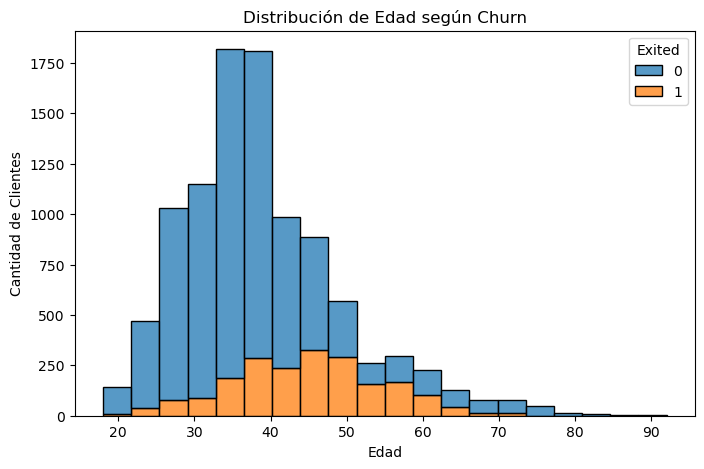

In [6]:
"""
Pregunta 1:
¿Existe relación entre la edad del cliente y su decisión de abandonar el banco?
 Hipótesis H1: Los clientes mayores tienden a abandonar el banco con mayor frecuencia.

"""

# Histograma de edades según churn (univariado):

plt.figure(figsize=(8, 5))
sns.histplot(data=df, x='Age', hue='Exited', multiple='stack', bins=20)
plt.title("Distribución de Edad según Churn")
plt.xlabel("Edad")
plt.ylabel("Cantidad de Clientes")
plt.show()



In [ ]:
"""
Interpretación:
 El histograma muestra una mayor proporción de clientes que abandonan el banco (Exited = 1) en los rangos etarios más altos (a partir de los 45 años), 
 lo cual refuerza la hipótesis de que los clientes mayores presentan mayor churn. Los clientes más jóvenes, en cambio, tienden a quedarse.

"""

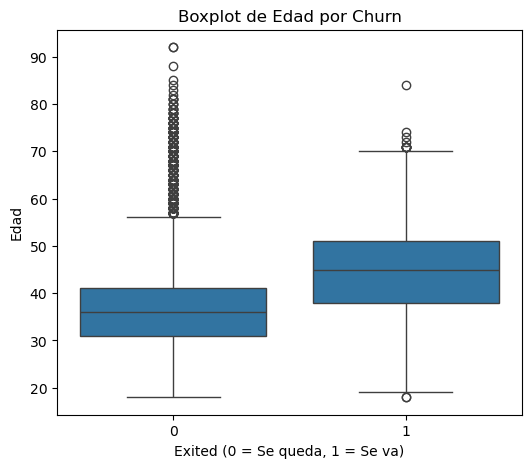

In [7]:
# Boxplot de edad según Exited (bivariado):

plt.figure(figsize=(6, 5))
sns.boxplot(data=df, x='Exited', y='Age')
plt.title("Boxplot de Edad por Churn")
plt.xlabel("Exited (0 = Se queda, 1 = Se va)")
plt.ylabel("Edad")
plt.show()



In [ ]:
"""
Interpretación:
 El boxplot evidencia que la mediana de edad de los clientes que se fueron es más alta que la de los que se quedaron. 
 Además, se observa una mayor dispersión de edades en el grupo que abandonó el banco, apoyando la idea de que la edad es un factor asociado al churn.
"""

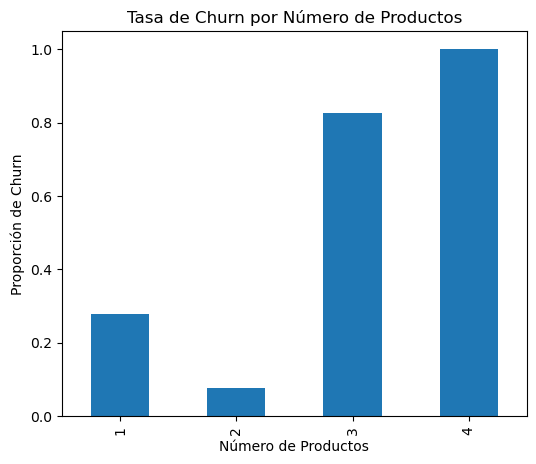

In [8]:
"""
Pregunta 2:
¿Los clientes con más productos financieros tienen menor tasa de abandono?
 Hipótesis H2: A mayor número de productos contratados, menor es la probabilidad de churn.

"""

# Tasa de churn por número de productos (barplot):

churn_by_products = df.groupby('NumOfProducts')['Exited'].mean()
plt.figure(figsize=(6, 5))
churn_by_products.plot(kind='bar')
plt.title("Tasa de Churn por Número de Productos")
plt.xlabel("Número de Productos")
plt.ylabel("Proporción de Churn")
plt.show()

In [ ]:
"""
Interpretación:
 Se observa que los clientes con 1 o 2 productos tienen una tasa de churn considerable, mientras que los que tienen 4 productos no abandonan el banco 
 (tasa de churn = 0). Esto respalda parcialmente la hipótesis: la mayor vinculación parece estar asociada a una menor propensión al abandono, aunque también 
 se nota que los clientes con 3 productos tienen una tasa elevada, lo cual merece más análisis.

"""

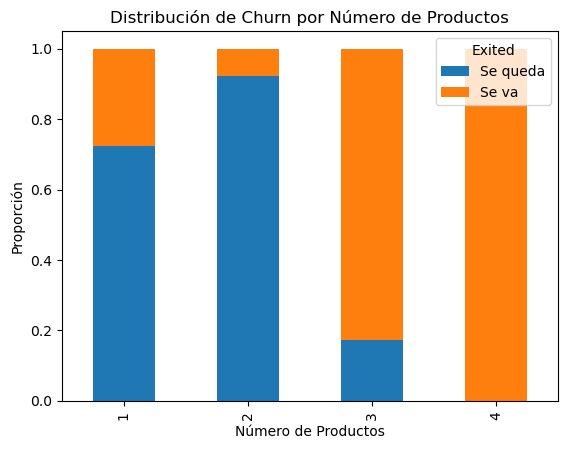

In [9]:
# Gráfico de barras apiladas de churn por número de productos:

pd.crosstab(df['NumOfProducts'], df['Exited'], normalize='index').plot(kind='bar', stacked=True)
plt.title("Distribución de Churn por Número de Productos")
plt.xlabel("Número de Productos")
plt.ylabel("Proporción")
plt.legend(title="Exited", labels=["Se queda", "Se va"])
plt.show()


In [ ]:
"""
Interpretación:
 Este gráfico confirma que la proporción de clientes que se quedan (Exited = 0) es mayor en quienes tienen 1 o 4 productos, mientras que en los que tienen 2 o 3 productos 
 hay un porcentaje más elevado de abandonos. La hipótesis se sostiene de forma general, aunque con algunas excepciones.
"""

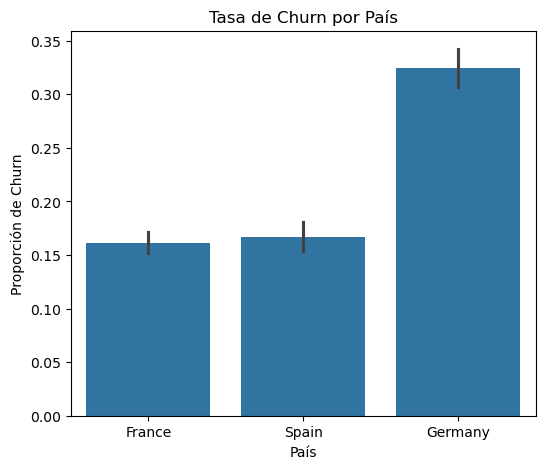

In [10]:
"""
Pregunta 3:
¿Hay diferencias significativas en la tasa de churn según el país o el género del cliente?
 Hipótesis H3: La tasa de churn varía significativamente entre países.

"""

# Churn por país (Geography):

plt.figure(figsize=(6, 5))
sns.barplot(data=df, x='Geography', y='Exited')
plt.title("Tasa de Churn por País")
plt.xlabel("País")
plt.ylabel("Proporción de Churn")
plt.show()

In [ ]:
"""
Interpretación:
 Alemania muestra una tasa de churn notablemente mayor que Francia y España, lo cual apoya la hipótesis de que existen diferencias regionales en el comportamiento de abandono. 
 Esto sugiere que factores culturales o económicos asociados al país de residencia podrían estar influyendo.

"""

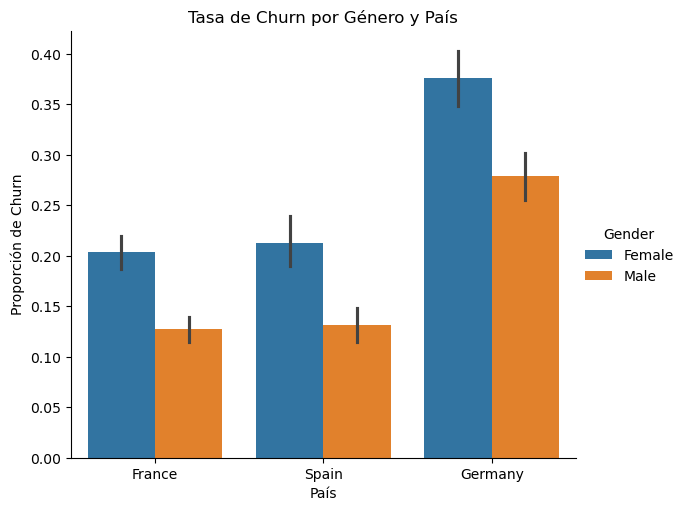

In [11]:
# Churn por género y país:

sns.catplot(data=df, x='Geography', hue='Gender', y='Exited', kind='bar', height=5, aspect=1.2)
plt.title("Tasa de Churn por Género y País")
plt.xlabel("País")
plt.ylabel("Proporción de Churn")
plt.show()



In [ ]:
"""
Interpretación:
 El gráfico revela que la diferencia de churn por país también se ve reflejada en cada género. Particularmente en Alemania, tanto hombres como mujeres presentan tasas altas. 
 En Francia y España, la diferencia de género no parece significativa. Esto aporta matices interesantes a la hipótesis y sugiere la necesidad de explorar interacciones más complejas.

"""


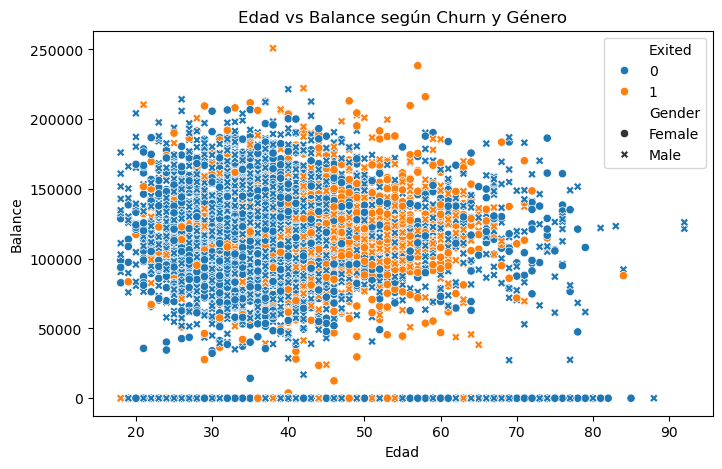

In [12]:
# Visualización multivariada

"""
Gráfico: Edad vs. Balance, según churn y género

"""

plt.figure(figsize=(8, 5))
sns.scatterplot(data=df, x='Age', y='Balance', hue='Exited', style='Gender')
plt.title("Edad vs Balance según Churn y Género")
plt.xlabel("Edad")
plt.ylabel("Balance")
plt.show()

In [ ]:
"""
Interpretación:
 Esta visualización permite observar patrones combinados: los clientes que abandonan tienden a tener un balance más alto y una edad más avanzada. 
 Además, se aprecia que hay más mujeres entre quienes tienen balances altos y churn positivo. Esto refuerza las conclusiones anteriores y aporta una 
 mirada más rica sobre los factores combinados que podrían estar influyendo en el abandono.

"""